# Data 2021

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_meteo1 = pd.read_csv('datasets/energia_202109-202112.csv', encoding='latin1')
df_energia1 = pd.read_csv('datasets/meteo_202109-202112.csv', encoding='latin1')
df_submission = pd.read_csv('datasets/dummy_submission.csv')

In [3]:
df_meteo1.rename(columns={'Data': 'date', 'Hora': 'hour'}, inplace=True)
df_meteo1

,date,hour,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh)
0,2021-09-29,0,0.000,0.000,0.0,NaN
1,2021-09-29,1,0.000,0.000,0.0,NaN
2,2021-09-29,2,0.000,0.000,0.0,NaN
3,2021-09-29,3,0.000,0.000,0.0,NaN
4,2021-09-29,4,0.000,0.000,0.0,NaN
...,...,...,...,...,...,...
2251,2021-12-31,19,2.176,0.000,0.0,NaN
2252,2021-12-31,20,0.732,0.000,0.0,NaN
2253,2021-12-31,21,0.704,0.000,0.0,NaN
2254,2021-12-31,22,0.000,0.424,0.0,NaN


In [4]:
df_energia1

,dt,dt_iso,city_name,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,1630454400,2021-09-01 00:00:00 +0000 UTC,local,18.74,18.84,15.72,20.34,1015,NaN,NaN,83,1.18,NaN,78,broken clouds
1,1630458000,2021-09-01 01:00:00 +0000 UTC,local,18.73,18.83,15.72,20.34,1014,NaN,NaN,83,1.46,NaN,92,overcast clouds
2,1630461600,2021-09-01 02:00:00 +0000 UTC,local,17.84,17.98,16.72,20.34,1014,NaN,NaN,88,1.05,NaN,91,overcast clouds
3,1630465200,2021-09-01 03:00:00 +0000 UTC,local,18.27,18.40,16.68,20.34,1014,NaN,NaN,86,0.46,0.14,94,light rain
4,1630468800,2021-09-01 04:00:00 +0000 UTC,local,17.81,17.97,16.12,20.34,1013,NaN,NaN,89,0.93,1.26,95,moderate rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,1640977200,2021-12-31 19:00:00 +0000 UTC,local,16.72,16.35,16.22,17.79,1024,NaN,NaN,73,3.05,NaN,91,overcast clouds
2924,1640980800,2021-12-31 20:00:00 +0000 UTC,local,16.54,16.10,15.67,17.23,1024,NaN,NaN,71,3.32,NaN,97,overcast clouds
2925,1640984400,2021-12-31 21:00:00 +0000 UTC,local,15.71,15.09,15.66,16.22,1023,NaN,NaN,67,3.43,NaN,94,overcast clouds
2926,1640988000,2021-12-31 22:00:00 +0000 UTC,local,16.59,15.98,16.21,16.72,1024,NaN,NaN,64,3.29,NaN,83,broken clouds


In [5]:
# Converter a coluna 'dt_iso' para datetime
df_energia1['dt_iso'] = pd.to_datetime(df_energia1['dt_iso'], format='%Y-%m-%d %H:%M:%S %z UTC')

# Criar novas colunas 'date' e 'hour'
df_energia1['date'] = df_energia1['dt_iso'].dt.strftime('%Y-%m-%d')
df_energia1['hour'] = df_energia1['dt_iso'].dt.hour

# Reordenar as colunas
df_energia1 = df_energia1[['date', 'hour'] + [col for col in df_energia1.columns if col not in ['dt_iso', 'date', 'hour']]]

# Exibir o DataFrame resultante
df_energia1

,date,hour,dt,city_name,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,2021-09-01,0,1630454400,local,18.74,18.84,15.72,20.34,1015,NaN,NaN,83,1.18,NaN,78,broken clouds
1,2021-09-01,1,1630458000,local,18.73,18.83,15.72,20.34,1014,NaN,NaN,83,1.46,NaN,92,overcast clouds
2,2021-09-01,2,1630461600,local,17.84,17.98,16.72,20.34,1014,NaN,NaN,88,1.05,NaN,91,overcast clouds
3,2021-09-01,3,1630465200,local,18.27,18.40,16.68,20.34,1014,NaN,NaN,86,0.46,0.14,94,light rain
4,2021-09-01,4,1630468800,local,17.81,17.97,16.12,20.34,1013,NaN,NaN,89,0.93,1.26,95,moderate rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,2021-12-31,19,1640977200,local,16.72,16.35,16.22,17.79,1024,NaN,NaN,73,3.05,NaN,91,overcast clouds
2924,2021-12-31,20,1640980800,local,16.54,16.10,15.67,17.23,1024,NaN,NaN,71,3.32,NaN,97,overcast clouds
2925,2021-12-31,21,1640984400,local,15.71,15.09,15.66,16.22,1023,NaN,NaN,67,3.43,NaN,94,overcast clouds
2926,2021-12-31,22,1640988000,local,16.59,15.98,16.21,16.72,1024,NaN,NaN,64,3.29,NaN,83,broken clouds


In [6]:
# Supondo que 'date' e 'hour' sejam colunas em ambos os DataFrames
df = pd.merge(df_energia1, df_meteo1, on=['date', 'hour'], how='inner')

# Exibir o DataFrame resultante
df

,date,hour,dt,city_name,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh)
0,2021-09-29,0,1632873600,local,13.97,13.54,11.45,14.04,1027,NaN,NaN,81,1.96,NaN,87,overcast clouds,0.000,0.000,0.0,NaN
1,2021-09-29,1,1632877200,local,13.48,13.02,13.43,13.90,1028,NaN,NaN,82,1.83,NaN,91,overcast clouds,0.000,0.000,0.0,NaN
2,2021-09-29,2,1632880800,local,12.93,12.47,12.72,13.43,1027,NaN,NaN,84,1.96,NaN,93,overcast clouds,0.000,0.000,0.0,NaN
3,2021-09-29,3,1632884400,local,12.61,12.15,10.34,12.93,1027,NaN,NaN,85,1.85,NaN,95,overcast clouds,0.000,0.000,0.0,NaN
4,2021-09-29,4,1632888000,local,12.61,12.17,9.79,12.93,1027,NaN,NaN,86,1.83,NaN,93,overcast clouds,0.000,0.000,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251,2021-12-31,19,1640977200,local,16.72,16.35,16.22,17.79,1024,NaN,NaN,73,3.05,NaN,91,overcast clouds,2.176,0.000,0.0,NaN
2252,2021-12-31,20,1640980800,local,16.54,16.10,15.67,17.23,1024,NaN,NaN,71,3.32,NaN,97,overcast clouds,0.732,0.000,0.0,NaN
2253,2021-12-31,21,1640984400,local,15.71,15.09,15.66,16.22,1023,NaN,NaN,67,3.43,NaN,94,overcast clouds,0.704,0.000,0.0,NaN
2254,2021-12-31,22,1640988000,local,16.59,15.98,16.21,16.72,1024,NaN,NaN,64,3.29,NaN,83,broken clouds,0.000,0.424,0.0,NaN


<Axes: >

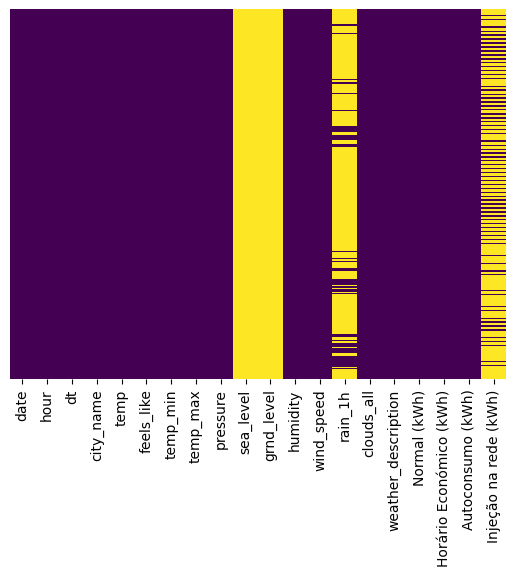

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     2256 non-null   object 
 1   hour                     2256 non-null   int32  
 2   dt                       2256 non-null   int64  
 3   city_name                2256 non-null   object 
 4   temp                     2256 non-null   float64
 5   feels_like               2256 non-null   float64
 6   temp_min                 2256 non-null   float64
 7   temp_max                 2256 non-null   float64
 8   pressure                 2256 non-null   int64  
 9   sea_level                0 non-null      float64
 10  grnd_level               0 non-null      float64
 11  humidity                 2256 non-null   int64  
 12  wind_speed               2256 non-null   float64
 13  rain_1h                  386 non-null    float64
 14  clouds_all              

In [9]:
df = df.drop(['city_name', 'sea_level', 'grnd_level'], axis=1)

In [10]:
df

,date,hour,dt,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh)
0,2021-09-29,0,1632873600,13.97,13.54,11.45,14.04,1027,81,1.96,NaN,87,overcast clouds,0.000,0.000,0.0,NaN
1,2021-09-29,1,1632877200,13.48,13.02,13.43,13.90,1028,82,1.83,NaN,91,overcast clouds,0.000,0.000,0.0,NaN
2,2021-09-29,2,1632880800,12.93,12.47,12.72,13.43,1027,84,1.96,NaN,93,overcast clouds,0.000,0.000,0.0,NaN
3,2021-09-29,3,1632884400,12.61,12.15,10.34,12.93,1027,85,1.85,NaN,95,overcast clouds,0.000,0.000,0.0,NaN
4,2021-09-29,4,1632888000,12.61,12.17,9.79,12.93,1027,86,1.83,NaN,93,overcast clouds,0.000,0.000,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251,2021-12-31,19,1640977200,16.72,16.35,16.22,17.79,1024,73,3.05,NaN,91,overcast clouds,2.176,0.000,0.0,NaN
2252,2021-12-31,20,1640980800,16.54,16.10,15.67,17.23,1024,71,3.32,NaN,97,overcast clouds,0.732,0.000,0.0,NaN
2253,2021-12-31,21,1640984400,15.71,15.09,15.66,16.22,1023,67,3.43,NaN,94,overcast clouds,0.704,0.000,0.0,NaN
2254,2021-12-31,22,1640988000,16.59,15.98,16.21,16.72,1024,64,3.29,NaN,83,broken clouds,0.000,0.424,0.0,NaN


In [11]:
# Contagem de valores nulos em cada coluna
print(df.isnull().sum())

date                          0
hour                          0
dt                            0
temp                          0
feels_like                    0
temp_min                      0
temp_max                      0
pressure                      0
humidity                      0
wind_speed                    0
rain_1h                    1870
clouds_all                    0
weather_description           0
Normal (kWh)                  0
Horário Económico (kWh)       0
Autoconsumo (kWh)             0
Injeção na rede (kWh)      1690
dtype: int64


In [12]:
# Contagem de valores únicos em cada coluna
print(df.nunique())

date                         94
hour                         24
dt                         2256
temp                       1023
feels_like                 1214
temp_min                    245
temp_max                    229
pressure                     35
humidity                     68
wind_speed                  554
rain_1h                     149
clouds_all                  101
weather_description           8
Normal (kWh)                772
Horário Económico (kWh)     329
Autoconsumo (kWh)           440
Injeção na rede (kWh)         4
dtype: int64


In [13]:
# Verificar a presença de valores NaN no DataFrame
print(df.isna().values.any())

True


In [14]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [15]:
df['rain_1h'].fillna(0, inplace=True)
df['Injeção na rede (kWh)'].replace({np.nan: None}, inplace=True)
df

,date,hour,dt,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh)
0,2021-09-29,0,1632873600,13.97,13.54,11.45,14.04,1027,81,1.96,0.0,87,overcast clouds,0.000,0.000,0.0,None
1,2021-09-29,1,1632877200,13.48,13.02,13.43,13.90,1028,82,1.83,0.0,91,overcast clouds,0.000,0.000,0.0,None
2,2021-09-29,2,1632880800,12.93,12.47,12.72,13.43,1027,84,1.96,0.0,93,overcast clouds,0.000,0.000,0.0,None
3,2021-09-29,3,1632884400,12.61,12.15,10.34,12.93,1027,85,1.85,0.0,95,overcast clouds,0.000,0.000,0.0,None
4,2021-09-29,4,1632888000,12.61,12.17,9.79,12.93,1027,86,1.83,0.0,93,overcast clouds,0.000,0.000,0.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251,2021-12-31,19,1640977200,16.72,16.35,16.22,17.79,1024,73,3.05,0.0,91,overcast clouds,2.176,0.000,0.0,None
2252,2021-12-31,20,1640980800,16.54,16.10,15.67,17.23,1024,71,3.32,0.0,97,overcast clouds,0.732,0.000,0.0,None
2253,2021-12-31,21,1640984400,15.71,15.09,15.66,16.22,1023,67,3.43,0.0,94,overcast clouds,0.704,0.000,0.0,None
2254,2021-12-31,22,1640988000,16.59,15.98,16.21,16.72,1024,64,3.29,0.0,83,broken clouds,0.000,0.424,0.0,None


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     2256 non-null   datetime64[ns]
 1   hour                     2256 non-null   int32         
 2   dt                       2256 non-null   int64         
 3   temp                     2256 non-null   float64       
 4   feels_like               2256 non-null   float64       
 5   temp_min                 2256 non-null   float64       
 6   temp_max                 2256 non-null   float64       
 7   pressure                 2256 non-null   int64         
 8   humidity                 2256 non-null   int64         
 9   wind_speed               2256 non-null   float64       
 10  rain_1h                  2256 non-null   float64       
 11  clouds_all               2256 non-null   int64         
 12  weather_description      2256 non-

# Modelos bonitos <3

### Guardar no dummy_submissions

In [17]:
# Assuming 'injecao na rede' is the name of the column in df
df_submission.iloc[:, 1] = df['Injeção na rede (kWh)'].values

# Display the updated df_submission DataFrame
df_submission

,RowId,Result
0,1,None
1,2,None
2,3,None
3,4,None
4,5,None
...,...,...
2251,2252,None
2252,2253,None
2253,2254,None
2254,2255,None


In [30]:
df_submission.replace({None: 'None', np.nan: 'None'}, inplace=True)
df_submission.to_csv('./datasets/dummy_submission.csv', index=False)